# Image Classification with Pre-trained Keras models

Keras provides several pretrained models which can be used directly and easily for classification. Multiple pretrained models are available in Keras. To review the whole set go to: https://keras.io/api/applications/

In [1]:
#This segment verifies the setup
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"



# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

We need to include models and processing package that are specific to that model. Here we have given examples with 2 different models. Use only one model at a time

In [2]:
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.resnet50 import ResNet50 as myModel
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

#from tensorflow.keras.applications.inception_v3 import InceptionV3 as myModel
#from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions



Include the correct model with the weights

In [3]:
model = myModel(weights="imagenet")

img.shape <class 'PIL.Image.Image'>


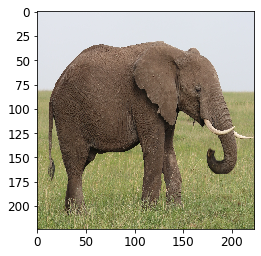

In [4]:
img_path = '../extra_images/elephant.jpg'

#Resnet50 needs inputs of size (224, 224)
img = image.load_img(img_path, target_size=(224, 224))


#InceptionV3 needs images of size (299, 299)
#img = image.load_img(img_path, target_size=(299, 299))


print ("img.shape", type(img))
plt.imshow(np.asarray(img)) #To enable showing PIL image



In [5]:

#Converts a PIL image to np array
x = image.img_to_array(img)
print ("x.shape", x.shape)

#We have to feed an array of images 
x= np.array([x])
#x = np.expand_dims(x, axis=0)
print ("x expand dims shape", x.shape)

#Preprocess the color channels for the specific model
x = preprocess_input(x)
print ("x expand preprocess", x.shape)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

x.shape (224, 224, 3)
x expand dims shape (1, 224, 224, 3)
x expand preprocess (1, 224, 224, 3)
Predicted: [('n02504458', 'African_elephant', 0.802476), ('n02504013', 'Indian_elephant', 0.096842274), ('n01871265', 'tusker', 0.07546667)]
